# Obucavanje modela

## Linearna regresija


### Jednacina
$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$<br>
$\hat{y}$ -> predvidjanje<br>
$n$ -> broj ulaznih osobina<br>
$x_i$ -> vrednost i-te osobine<br>
$\theta_j$ -> j-ti parameta modela

### Funkcija gubitka MSE za linearnu regresiju

$MSE(X,h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2$

### Jednacina zatvorenog oblika

Resavanjem ove jednacine se moze doci do najboljih vrednosti za $\theta$<br>
$\hat{\theta} = (X^TX)^{-1}X^Ty$

(0.0, 2.0, 0.0, 15.0)

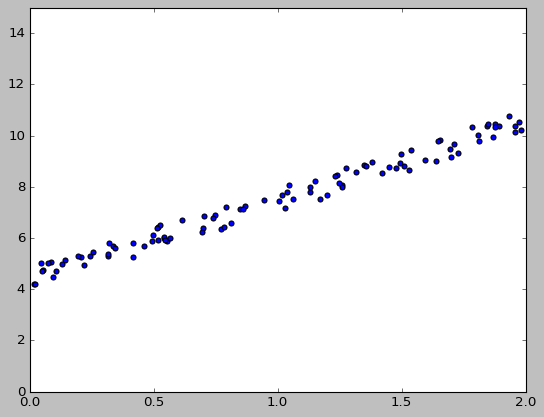

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('classic')

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # dodaje x0 = 1 svakom primeru
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.50060907],
       [3.01643514]])

(0.0, 2.0, 0.0, 15.0)

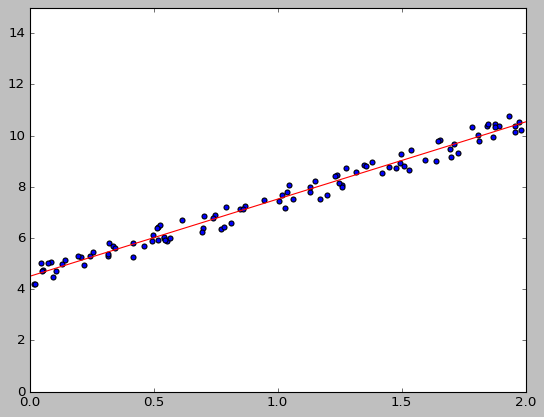

In [3]:
X_new = np.array([[0], [2]])
X_newb = np.c_[np.ones((2, 1)), X_new]
y_pred = X_newb.dot(theta_best)
plt.scatter(X, y)
plt.plot(X_new, y_pred, 'r')
plt.axis([0, 2, 0, 15])

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.50060907]), array([[3.01643514]]))

### Gradijenti spust


Jako je bitno skalirati podatke pre pustanja algoritma gradijetnog spusta

| Algoritam | Veliki m | Rad van jezgra | Veliki n | Hiperparametri | Obavezno skaliranje | Scikit-learn klasa |
| --- | --- | --- | --- | --- | --- | --- |
| Normalna jednacina | Brz | Ne | Spor | 0 | Ne | Nema |
| SVD | | Ne | Spor | 0 | Ne | LinearRegression |
| Paketni GS | | Ne | Brz | 2 | Da | SGDRegressor |
| Stogasticki GS | | Da | Brz | >= 2 | Da | SGDRegressor |
| Mini-paketni GS | | Da | Brz | >= 2 | Da | SGDRegressor |

#### Paketni gradijenti spust


Za algoritam gradijentnog spusta potrebno je da se izracunaju nagibi funkcije gubitka za svaki parameta modela $\theta$, to jest parcijalni izvodi.

##### Jednacina za jedan parametar


$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})x^{(i)}_j$

##### Vektor nagiba funkcije gubitka


$\nabla_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$<br><br>
Ova formula obradjuje ceo trening skup zato se ovaj vid gradijentnog spusta naziva paketni.

array([[4.48091972],
       [3.03310286]])

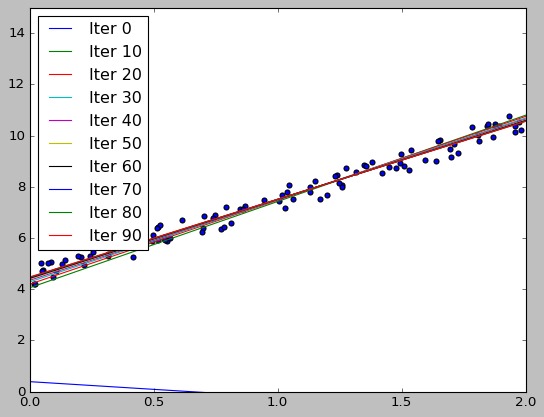

In [5]:
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1)

plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  if iteration % 10 == 0:
    X_new = np.array([[0], [2]])
    X_newb = np.c_[np.ones((2, 1)), X_new]
    y_pred = X_newb.dot(theta)
    plt.plot(X_new, y_pred, label= 'Iter ' + str(iteration))
    plt.legend(loc='upper left')
  theta -= eta * gradients

theta

#### Stohasticki gradijenti spust

Ovaj vid gradijentnog spusta se zasniva na uzimanju nasumicno jednog primera iz trening skupa.<br>
Nasumicnost je dobra za zaobilazenje lokalnih minimuma, ali je i losa zato sto se algoritam nikada ne moze zaustaviti tacno na minimumu. Jedno od resenja je postepeno smanjivanje brzine ucenja.

array([[4.41617287],
       [3.0563148 ]])

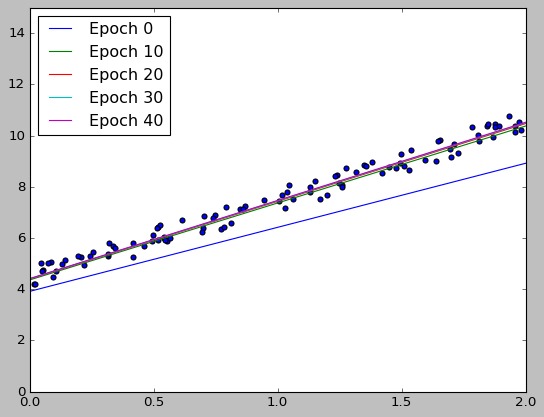

In [6]:
n_epochs = 50
t0, t1 = 20, 50


plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2/m * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + 1)
    theta -= eta * gradients
  if epoch % 10 == 0:
    X_new = np.array([[0], [2]])
    X_newb = np.c_[np.ones((2, 1)), X_new]
    y_pred = X_newb.dot(theta)
    plt.plot(X_new, y_pred, label='Epoch ' + str(epoch))
    plt.legend(loc='upper left')
    
theta
    

Trening primeri moraju biti nezavisni i identicno distribuirani jer u suprotnom ako su npr. sortirani po oznaci SGD bi optimizovao za jednu po jednu oznaku i ne bi stigao do globalnog minimuma.

In [7]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.48665167]), array([3.03627231]))

#### Mini-paketni gradijentni spust



Izracunava nagibe koristeci manje, nasumicno izabrane skupove podataka.

## Polinomska regresija

Iako su podaci slozeniji od prave linije moguce je iskoristiti linearni model za uklapanje tih podataka. To se postize tako sto se dodaju nove osobine koje su stepenovane vrednosti postojecih osobina pa se linearni regresor trenira na tom novom prosirenom skupu podataka.

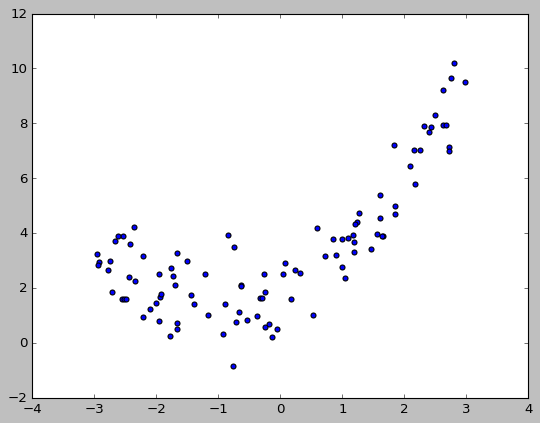

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-2.09659826]),
 array([  -2.09659826,    4.39572426,   -9.21606783,   19.32239178,
         -40.51129297,   84.93590633, -178.07647337,  373.3548241 ,
        -782.77507433, 1641.16485832]))

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.61727938]),
 array([[ 1.41090373e+00,  1.77925665e+00, -7.81532384e-01,
         -1.05720890e+00,  3.30440268e-01,  3.19221310e-01,
         -4.97129497e-02, -3.95589903e-02,  2.47981858e-03,
          1.71579740e-03]]))

array([[2.96221883],
       [2.91602263],
       [2.4209048 ],
       [1.88451447],
       [1.71489544],
       [1.77363034],
       [1.75648911],
       [1.56557951],
       [1.37390895],
       [1.44125528],
       [1.88071554],
       [2.55966062],
       [3.20847585],
       [3.66681817],
       [4.08157416],
       [4.8446666 ],
       [6.18373364],
       [7.65590156],
       [8.40579235],
       [9.99495887]])

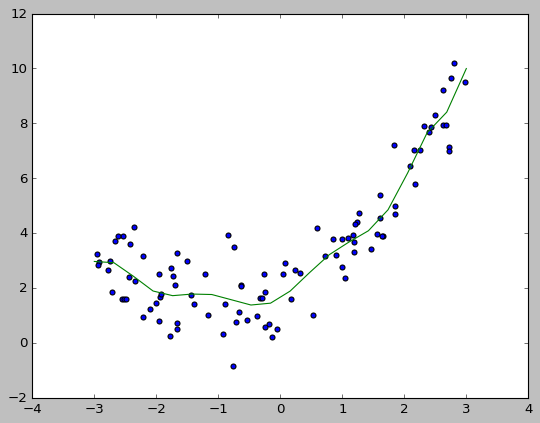

In [11]:
X_new = np.array([np.linspace(-3, 3, 20)]).T
X_new_poly = poly_features.fit_transform(X_new)
y_pred_2 = lin_reg.predict(X_new_poly)
plt.scatter(X, y)
#plt.plot(X_new, y_pred, 'r')
plt.plot(X_new, y_pred_2, 'g')
y_pred_2

## Krive ucenja

Kriva ucenja -> dijagram performansi modela sa trening i probnim skupom kao funkcija velicine trening skupa.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_pred = model.predict(X_train[:m])
    y_val_pred = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Trening primeri')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validacioni primeri')
  plt.xlabel('Velicina trening skupa')
  plt.ylabel('RMSE')
  plt.legend(loc='lower right')
  plt.axis([0, len(X_train), 0, 3.0])

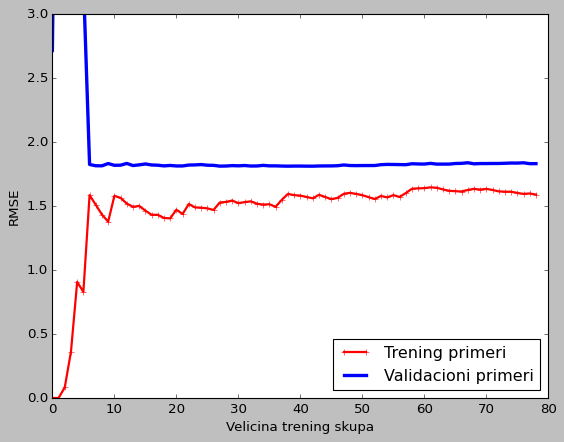

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Ovo je primer modela koji se nedovoljno uklapa u podatke. Kriva trening primera raste i stagnira dok se kriva validacionih primera malo spusta i stagnira. Dodavanjem novih primera ne mozemo dobiti bolje performanse, treba nam drugi model.

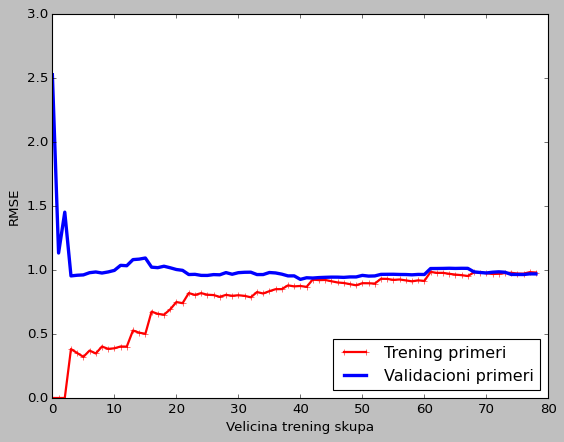

In [32]:
from sklearn.pipeline import Pipeline

poly_pipeline = Pipeline([
  ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
  ('lin_reg', LinearRegression())
  ])
plot_learning_curves(poly_pipeline, X, y)

<b>Kompromis izmedju odstupanja i varijanse</b><br>

Odstupanje -> uzrok odstupanja pri generalizovanju su pogresne polazne pretpostavke kao sto je ona da su podaci linearni kada su zapravo kvadratni.<br>
Varijansa -> uzrok varijanse je preterana osetljivost modela na male varijacije podataka za obuku, model sa vecim brojem stepena slobode ce imati visoku varijansu<br>

Povecavanjem slozenosti modela obicno se povecava njegova varijansa a smanjuje odstupanje i obrnuto.

## Regularizovani linearni modeli

### Grebenasta regresija

Funkciji gubitka dodaje se regularizacijski clan koji je jedank $\alpha\sum_{i=1}^{n}\theta^{2}_i$. Ovo algoritmu za ucenje namece ne samo da prati podatke nego i da odrzava sto manje tezine modela jer ce se u suprotnom greska povecati<br>
<b>Za koricvenje ove regularizacije klasi SGDRegressor daje se parametar penalty='l2'</b>

### Lasso regresija


$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_i|$<br><br>
SGDRegressor(penalty='l1')

### Rano zaustavljanje

Tehnika se zasniva na zaustavljanju rada modela kada greska pri predvidjanju krene da raste.

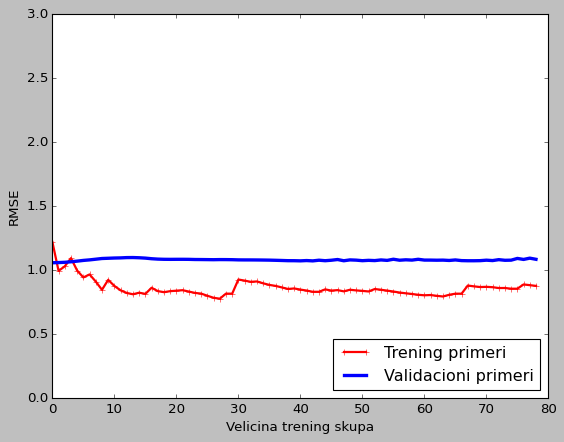

In [42]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
  ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
  ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

X_poly_scaled = poly_scaler.fit_transform(X)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_pred = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_pred)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
    
plot_learning_curves(sgd_reg, X_poly_scaled, y.ravel())

## Logisticka regresija

Procenjivanje verovatnoce modela<br>
$\hat{p}=\sigma(x^{T}\theta)$<br>
$\sigma()$ -> sigmoidna funkcija cija je vrednost od 0 do 1<br>
$\sigma(t)=\frac{1}{1 + exp(-t)}$

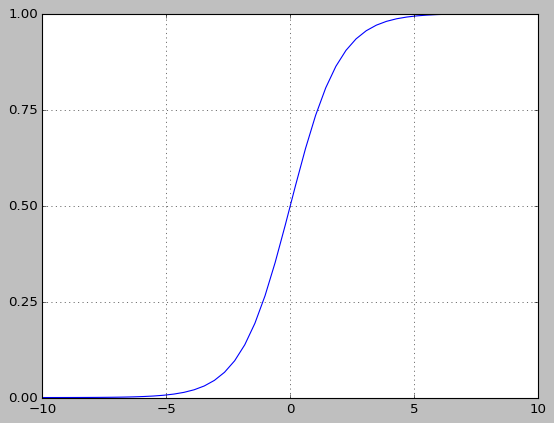

In [7]:
X = np.linspace(-10, 10, 50)
y = 1 / (1 + np.exp(-X))
plt.plot(X,y)
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.grid(True)

Kada model proceni verovatnocu $\hat{p}$ moze lako napraviti predvidjanja $\hat{y}$ <br>
0 ako je $\hat{p} < 0.5$<br>
1 ako je $\hat{p} >= 0.5$

### Obuka i funkcija gubitka

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})]$

Parcijalni izvodi funkcije gubitka za logisticku regresiju

$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^{(i)}) - y^{(i)})x^{(i)}_j$

Za obucavanje logisticke regresije mozemo upotrebiti bilo koji vid gradijentnog spusta.

### Granice odlucivanja

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int8)

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

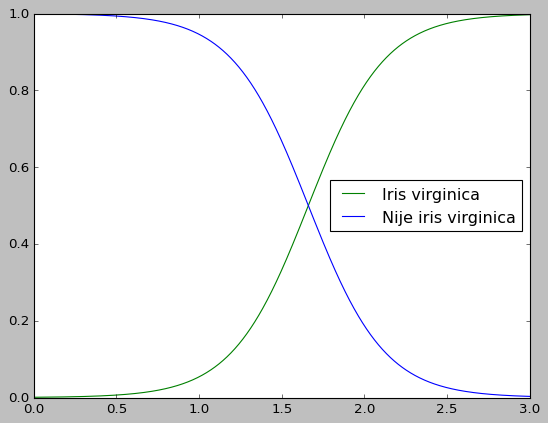

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b-', label='Nije iris virginica')
plt.legend(loc='center right')